# Machine Learning Regression Model

 Load the dataset

In [1]:
import pandas as pd 


In [3]:
df= pd.read_excel('Data/Data_Nifty_50_Processed.xlsx', parse_dates=['Date'], index_col=0)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Change_Tomorrow,Change_Tomorrow_direction
Date,,,,,,,,
2016-12-01,8244.000000,8250.799805,8185.049805,8192.900391,8192.900391,157700,-1.312022,DOWN
2016-12-02,8153.549805,8159.299805,8070.049805,8086.799805,8086.799805,171500,0.516072,UP
2016-12-05,8088.750000,8141.899902,8056.850098,8128.750000,8128.750000,126500,0.176835,UP
2016-12-06,8153.149902,8178.700195,8130.850098,8143.149902,8143.149902,115300,-0.507280,DOWN
2016-12-07,8168.399902,8190.450195,8077.500000,8102.049805,8102.049805,169800,1.755820,UP


# Machine learning Model

Seperate the data  

1. Target: which variable do you want ot predict? 
2. Explanatory: which variables will you use to calcualte the prediction?

In [5]:
target = df.Change_Tomorrow
explanatory = df[['Open', 'High', 'Low', 'Close', 'Volume']]

target

Date
2016-12-01   -1.312022
2016-12-02    0.516072
2016-12-05    0.176835
2016-12-06   -0.507280
2016-12-07    1.755820
                ...   
2024-10-09    0.066004
2024-10-10   -0.136993
2024-10-11    0.651463
2024-10-14   -0.281752
2024-10-15   -0.344591
Name: Change_Tomorrow, Length: 1941, dtype: float64

In [6]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-01,8244.000000,8250.799805,8185.049805,8192.900391,157700
2016-12-02,8153.549805,8159.299805,8070.049805,8086.799805,171500
2016-12-05,8088.750000,8141.899902,8056.850098,8128.750000,126500
2016-12-06,8153.149902,8178.700195,8130.850098,8143.149902,115300
2016-12-07,8168.399902,8190.450195,8077.500000,8102.049805,169800
...,...,...,...,...,...
2024-10-09,25065.800781,25234.050781,24947.699219,24981.949219,290600
2024-10-10,25067.050781,25134.050781,24979.400391,24998.449219,261400
2024-10-11,24985.300781,25028.650391,24920.050781,24964.250000,210500


Compute the model 

The following model will predict the numerical increase of the stock for the following data. 


In [10]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model_dt = DecisionTreeRegressor(max_depth=15)

In [26]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeRegressor(max_depth=15)

# Visualize the model

[Text(0.3402071931196247, 0.96875, 'Low <= 7863.175\nsquared_error = 1.168\nsamples = 1941\nvalue = 0.052'),
 Text(0.02501954652071931, 0.90625, 'Volume <= 737650.0\nsquared_error = 2.187\nsamples = 4\nvalue = 4.479'),
 Text(0.182613369820172, 0.9375, 'True  '),
 Text(0.012509773260359656, 0.84375, 'High <= 8268.0\nsquared_error = 0.422\nsamples = 2\nvalue = 3.095'),
 Text(0.006254886630179828, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = 2.446'),
 Text(0.018764659890539485, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.745'),
 Text(0.03752931978107897, 0.84375, 'Open <= 7955.8\nsquared_error = 0.123\nsamples = 2\nvalue = 5.862'),
 Text(0.03127443315089914, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = 6.213'),
 Text(0.0437842064112588, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = 5.511'),
 Text(0.6553948397185301, 0.90625, 'Volume <= 1011800.0\nsquared_error = 1.126\nsamples = 1937\nvalue = 0.042'),
 Text(0.49780101641907737, 0.9375, '  False'),
 Text(0.395

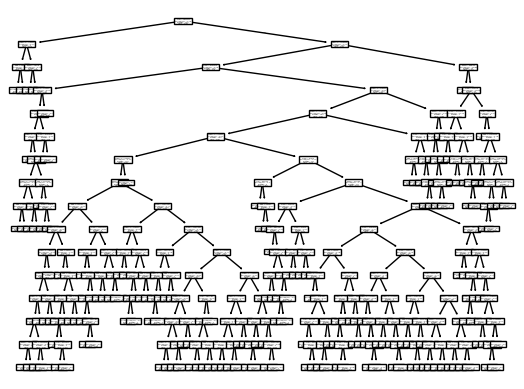

In [27]:
from sklearn.tree import plot_tree 
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

# Calculate the predictions

In [28]:
y_pred =model_dt.predict(X=explanatory)

In [29]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Change_Tomorrow', 'Change_Tomorrow_direction'],
      dtype='object')

In [30]:
df_predictions = df[['Change_Tomorrow']].copy()

df_predictions['prediction']=y_pred 
df_predictions

,Change_Tomorrow,prediction
Date,,
2016-12-01,-1.312022,0.104594
2016-12-02,0.516072,0.516072
2016-12-05,0.176835,0.104594
2016-12-06,-0.507280,0.104594
2016-12-07,1.755820,1.755820
...,...,...
2024-10-09,0.066004,0.032270
2024-10-10,-0.136993,0.032270
2024-10-11,0.651463,0.032270


# Evaluate the model: compare predictions with the reality

In [31]:
model_dt.score(X=explanatory, y=target)

0.4986749001025139

In [37]:
df_predictions['error']=df_predictions.prediction - df_predictions.Change_Tomorrow

In [38]:
df_predictions

,Change_Tomorrow,prediction,error
Date,,,
2016-12-01,-1.312022,0.104594,1.416616
2016-12-02,0.516072,0.516072,0.000000
2016-12-05,0.176835,0.104594,-0.072241
2016-12-06,-0.507280,0.104594,0.611874
2016-12-07,1.755820,1.755820,0.000000
...,...,...,...
2024-10-09,0.066004,0.032270,-0.033735
2024-10-10,-0.136993,0.032270,0.169262
2024-10-11,0.651463,0.032270,-0.619193


In [41]:
df_predictions.error.sum().round(2)

np.float64(-0.0)

In [42]:
df_predictions['error2']=df_predictions.error**2

In [44]:
sse=df_predictions.error2.sum()

In [45]:
mse = df_predictions.error2.mean()

In [46]:
import numpy as np 


In [50]:
rmse = np.sqrt(mse)

<Axes: >

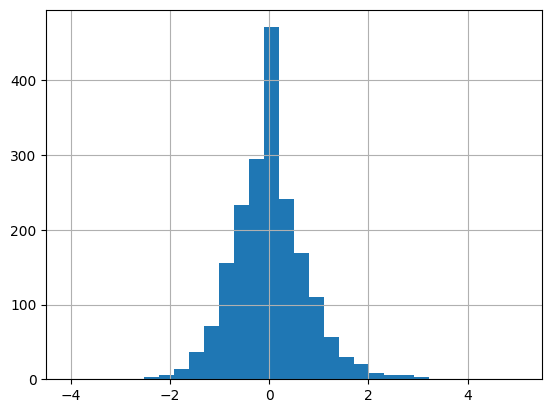

In [51]:
df_predictions.error.hist(bins=30)

In [53]:
rmse*2

np.float64(1.5305688220483182)

# Save the model into a file

In [54]:
import pickle

In [55]:
model_dt

DecisionTreeRegressor(max_depth=15)

In [56]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

# Backtesting ML Regression_Based

Load the model

In [57]:
import pickle

In [59]:
with open('models/model_dt_regression.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [60]:
model_dt

DecisionTreeRegressor(max_depth=15)

load the data 

In [61]:
import pandas as pd 

In [79]:
df = pd.read_excel('Data/Data_Nifty_50_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume,Change_Tomorrow,Change_Tomorrow_direction
Date,,,,,,,,
2016-12-01,8244.000000,8250.799805,8185.049805,8192.900391,8192.900391,157700,-1.312022,DOWN
2016-12-02,8153.549805,8159.299805,8070.049805,8086.799805,8086.799805,171500,0.516072,UP
2016-12-05,8088.750000,8141.899902,8056.850098,8128.750000,8128.750000,126500,0.176835,UP
2016-12-06,8153.149902,8178.700195,8130.850098,8143.149902,8143.149902,115300,-0.507280,DOWN
2016-12-07,8168.399902,8190.450195,8077.500000,8102.049805,8102.049805,169800,1.755820,UP
...,...,...,...,...,...,...,...,...
2024-10-09,25065.800781,25234.050781,24947.699219,24981.949219,24981.949219,290600,0.066004,UP
2024-10-10,25067.050781,25134.050781,24979.400391,24998.449219,24998.449219,261400,-0.136993,DOWN
2024-10-11,24985.300781,25028.650391,24920.050781,24964.250000,24964.250000,210500,0.651463,UP


# Backtesting.py libarary 

Create your strategy class

In [80]:
from backtesting import Backtest, Strategy

In [81]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt 
        self.already_bought = False 
    
    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow= model_dt.predict(explanatory_today)[0]
        
        # condition to sell or buy 
        
        if forecast_tomorrow > 5 and self.already_bought == False:
            self.buy() 
            self.already_bought = True
        
        elif forecast_tomorrow < -5   and self.already_bought == True:
            self.sell()
            self.already_bought = False 
        
        else:
            pass

Define initial conditons 

In [82]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Change_Tomorrow', 'Change_Tomorrow_direction'],
      dtype='object')

In [83]:
df_explanatory = df.drop(columns=['Change_Tomorrow', 'Change_Tomorrow_direction', 'Adj Close'])

In [84]:
bt = Backtest(df_explanatory, Regression, 
              cash =10000, commission=.002, exclusive_orders=True)

C:\Users\saura\AppData\Local\Temp\ipykernel_18212\3534731879.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(df_explanatory, Regression,


In [85]:
results = bt.run()

interpret backtesting results 

In [86]:
results.to_frame(name ='Values').loc[:'Return [%]']

,Values
Start,2016-12-01 00:00:00
End,2024-10-15 00:00:00
Duration,2875 days 00:00:00
Exposure Time [%],47.707367
Equity Final [$],0.0
Equity Peak [$],12313.40279
Return [%],-100.0
